<a href="https://colab.research.google.com/github/RoyMaman13/Kmeans_PCA/blob/main/Copy_of_Ex6_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Roy Maman, 206312654   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

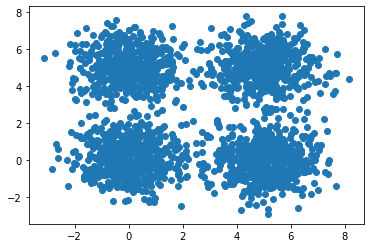

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [4]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X             
        samples_num, features_num = X.shape
        self.centroids = X[np.random.choice(samples_num, self.n_clusters, replace=False)]
        self.centroids_history.append(self.centroids)
        for i in range(self.max_iter):
            self.labels_ = self._get_labels(X)
            self.labels_history.append(self.labels_)
            self.centroids = self._get_centroids(X, self.labels_)
            self.centroids_history.append(self.centroids)
            self.costs.append(self._calculate_cost(X))
            
            if i > 0 :
              comparison = self.labels_history[i] == self.labels_history[i-1]
              equal_arrays = comparison.all()
              if(equal_arrays):
                self.max_iter = i
                break

    def predict(self, X):
       self._get_labels(X)

    def _get_distances(self, X):
        return np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
    
    def _get_labels(self, X):
        distances = self._get_distances(X)
        return np.argmin(distances, axis=0)

    def _get_centroids(self, X, labels):
        return np.array([X[labels == clus].mean(axis=0) for clus in range(self.n_clusters)])
    
    def _calculate_cost(self, X):
        distances = self._get_distances(X)
        return np.min(distances, axis=0).sum()




Run the algorithm on the 2D dataset

In [5]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

for iter  2 5433.035422819763
for iter  3 3935.3095390526705
for iter  4 2478.42838708698
for iter  5 2356.5291502179084
for iter  6 2236.0264675021153
for iter  7 2152.140084642964
for iter  8 2051.701888798099
for iter  9 1944.7917719576214
for iter  10 1888.7467316415396
for iter  11 1776.5675600123886
for iter  12 1829.2462649147642
for iter  13 1652.0831639595417
for iter  14 1589.5549780385152
for iter  15 1540.3783975119434
for iter  16 1490.4368332941917
for iter  17 1463.2537092044602
for iter  18 1420.491894979403
for iter  19 1403.854853307717
for iter  20 1341.791852750495


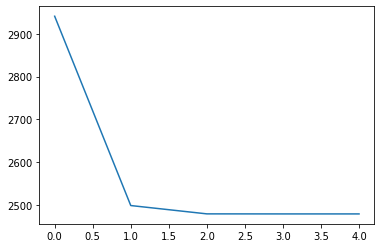

In [6]:
costs = kmeans.costs
plt.plot(costs)

for i in range (2, 21):

  knum = KMeans(n_clusters=i)
  knum.fit(X)
  print("for iter ", i , knum._calculate_cost(X))

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters:  5433.121071333832 <br>
3 clusters:  3945.2919630603938 <br>
4 clusters:  2495.3953699863623 <br>
6 clusters:  2276.7143618937935 <br>
8 clusters:  2030.3583559755743 <br>
10 clusters: 1896.0201496636782 <br>
20 clusters: 1385.1475083201653 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

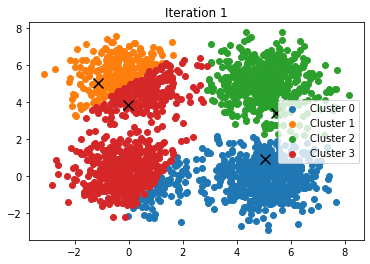

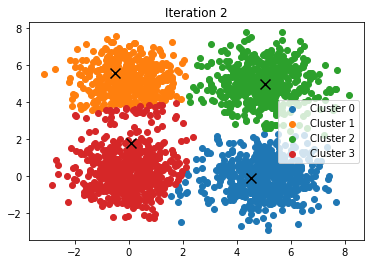

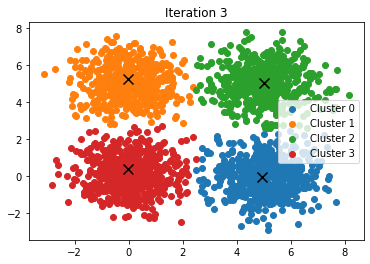

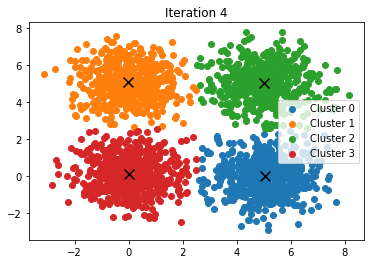

In [7]:
for i in range(kmeans.max_iter):
            plt.figure()
            for j in range(kmeans.n_clusters):
                cluster = kmeans.X_fit_[kmeans.labels_history[i] == j]
                plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {j}')
                plt.scatter(kmeans.centroids_history[i][j][0], kmeans.centroids_history[i][j][1], marker='x', c='black', s=100)
            plt.legend()
            plt.title(f'Iteration {i+1}')
            plt.show()



## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [9]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [10]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        # center the data
        X_centered = X - np.mean(X, axis=0)

        # calculate the covariance matrix
        cov_matrix = np.dot(X_centered.T, X_centered)

        # calculate the eigenvectors and eigenvalues of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # sort the eigenvectors based on the eigenvalues in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # store the eigenvectors as the principal components
        self.V = eigenvectors

        return self.V

    def transform(self, X, n_dimentions):
      # center the data
      X_centered = X - np.mean(X, axis=0)

      # project the data onto the first n_dimentions principal components
      X_reduced = np.dot(X_centered, self.V[:, :n_dimentions]).T

      return X_reduced

Run the algorithm on MNIST dataset.

In [11]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T

Plot the data in the top 2 principal component space.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


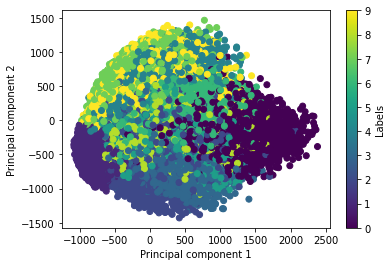

In [12]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

In [13]:
########################
#### YOUR CODE HERE ####
########################


Your Explanation:

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [14]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####
    return None

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


In [15]:
########################
#### YOUR CODE HERE ####
########################